In [22]:
import pandas as pd

# Importing data

In [23]:
df_train = pd.read_csv('./formated_data/train.csv')
df_train

,county,is_business,product_type,target,is_consumption,data_block_id,prediction_unit_id,euros_per_mwh_elec,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,...,surface_solar_radiation_downwards,snowfall_fc,total_precipitation,sin_hour,cos_hour,sin_day,cos_day,sin_month,cos_month,year
0,0,0,1,0.713,0,0,0,92.51,45.23,46.32,...,NaN,NaN,NaN,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2021
1,0,0,1,96.590,1,0,0,92.51,45.23,46.32,...,NaN,NaN,NaN,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2021
2,0,0,2,0.000,0,0,1,92.51,45.23,46.32,...,NaN,NaN,NaN,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2021
3,0,0,2,17.314,1,0,1,92.51,45.23,46.32,...,NaN,NaN,NaN,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2021
4,0,0,3,2.904,0,0,2,92.51,45.23,46.32,...,NaN,NaN,NaN,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,637,64,NaN,NaN,NaN,...,0.0,0.0,0.0,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2023
2018348,15,1,1,0.000,0,637,59,NaN,NaN,NaN,...,0.0,0.0,0.0,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2023
2018349,15,1,1,28.404,1,637,59,NaN,NaN,NaN,...,0.0,0.0,0.0,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2023
2018350,15,1,3,0.000,0,637,60,NaN,NaN,NaN,...,0.0,0.0,0.0,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2023


In [24]:
df_train.isna().sum().sum()

110670

In [25]:
df_train.dropna(inplace=True)

# Train - Test

In [31]:
from sklearn.model_selection import train_test_split
X = df_train.drop('target', axis=1)
y = df_train['target']

def spliting_dataset(test_ratio=0.01, random_state_nb=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=random_state_nb)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = spliting_dataset()

# Modelisation

## Evaluation
Creating a function to test all the errors on each model, just by calling this function.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

def getMAE(model, X_test, y_test):
    mae = mean_absolute_error(y_test, model.predict(X_test))
    return round(mae, 4)

def model_evaluation(model_trained, test_evaluation=False):
    if test_evaluation:
        temp_y_pred = model_trained.predict(X_test)
    else:
        temp_y_pred = model_trained.predict(X_train)
    
    y_data = y_test if test_evaluation else y_train
    
    print("######## Test evaluation") if test_evaluation else print("######## Train evaluation")
    print(f'R2 score: {round(r2_score(y_data, temp_y_pred), 4)} (aiming 1.0)')
    print(f"Mean absolute error : {round(mean_absolute_error(y_data, temp_y_pred), 4)} (aiming 0)")
    print(f"Mean squared error : {round(mean_squared_error(y_data, temp_y_pred), 4)} (aiming 0)")
    # print(f"Mean absolute percentage error : {mean_absolute_percentage_error(y_data, temp_y_pred)}\n")

## Dummy
Creating a dummy regressor to compare our model with this dummy one. 
And see if the actual model is worth using or no any better than a dummy one

In [14]:
from sklearn.dummy import DummyRegressor
# Model training
dummy = DummyRegressor().fit(X_train, y_train)
dummy_mae = getMAE(dummy, X_test, y_test)

# Evaluating model
model_evaluation(dummy)
model_evaluation(dummy, True)

######## Train evaluation
R2 score: 0.0 (aiming 1.0)
Mean absolute error : 369.7832 (aiming 0)
Mean squared error : 826945.8207 (aiming 0)
######## Test evaluation
R2 score: -0.0002 (aiming 1.0)
Mean absolute error : 361.5369 (aiming 0)
Mean squared error : 761440.1421 (aiming 0)


## LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression
# Model training
reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
reg_mae = getMAE(reg, X_test, y_test)

# Evaluating model
model_evaluation(reg)
model_evaluation(reg, True)

######## Train evaluation
R2 score: 0.1346 (aiming 1.0)
Mean absolute error : 362.3444 (aiming 0)
Mean squared error : 715598.7033 (aiming 0)
######## Test evaluation
R2 score: 0.1333 (aiming 1.0)
Mean absolute error : 352.7565 (aiming 0)
Mean squared error : 659801.444 (aiming 0)


## Lasso

In [16]:
from sklearn.linear_model import Lasso
# Model training
lasso = Lasso(alpha=100).fit(X_train, y_train)
lasso_mae = getMAE(lasso, X_test, y_test)

# Evaluating model
model_evaluation(lasso)
model_evaluation(lasso, True)

######## Train evaluation
R2 score: 0.0613 (aiming 1.0)
Mean absolute error : 351.7788 (aiming 0)
Mean squared error : 776267.3558 (aiming 0)
######## Test evaluation
R2 score: 0.0601 (aiming 1.0)
Mean absolute error : 341.7156 (aiming 0)
Mean squared error : 715591.234 (aiming 0)


## Elastic Net

In [17]:
from sklearn.linear_model import ElasticNet
# Model training
elastic = ElasticNet().fit(X_train, y_train)
elastic_mae = getMAE(elastic, X_test, y_test)

# Evaluating model
model_evaluation(elastic)
model_evaluation(elastic, True)

######## Train evaluation
R2 score: 0.1012 (aiming 1.0)
Mean absolute error : 341.1256 (aiming 0)
Mean squared error : 743290.9363 (aiming 0)
######## Test evaluation
R2 score: 0.1009 (aiming 1.0)
Mean absolute error : 331.6348 (aiming 0)
Mean squared error : 684522.9937 (aiming 0)


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameters

# Model training
RFR = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train)
RFR_mae = getMAE(RFR, X_test, y_test)
# Evaluating model
model_evaluation(RFR)
model_evaluation(RFR, True)

KeyboardInterrupt: 

## Xgboost

In [32]:
import xgboost as xgb
xgb = xgb.XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
model_evaluation(xgb)
model_evaluation(xgb, True)

######## Train evaluation
R2 score: 0.9645 (aiming 1.0)
Mean absolute error : 68.6065 (aiming 0)
Mean squared error : 29373.93 (aiming 0)
######## Test evaluation
R2 score: 0.9587 (aiming 1.0)
Mean absolute error : 68.5402 (aiming 0)
Mean squared error : 31424.5568 (aiming 0)


<Axes: >

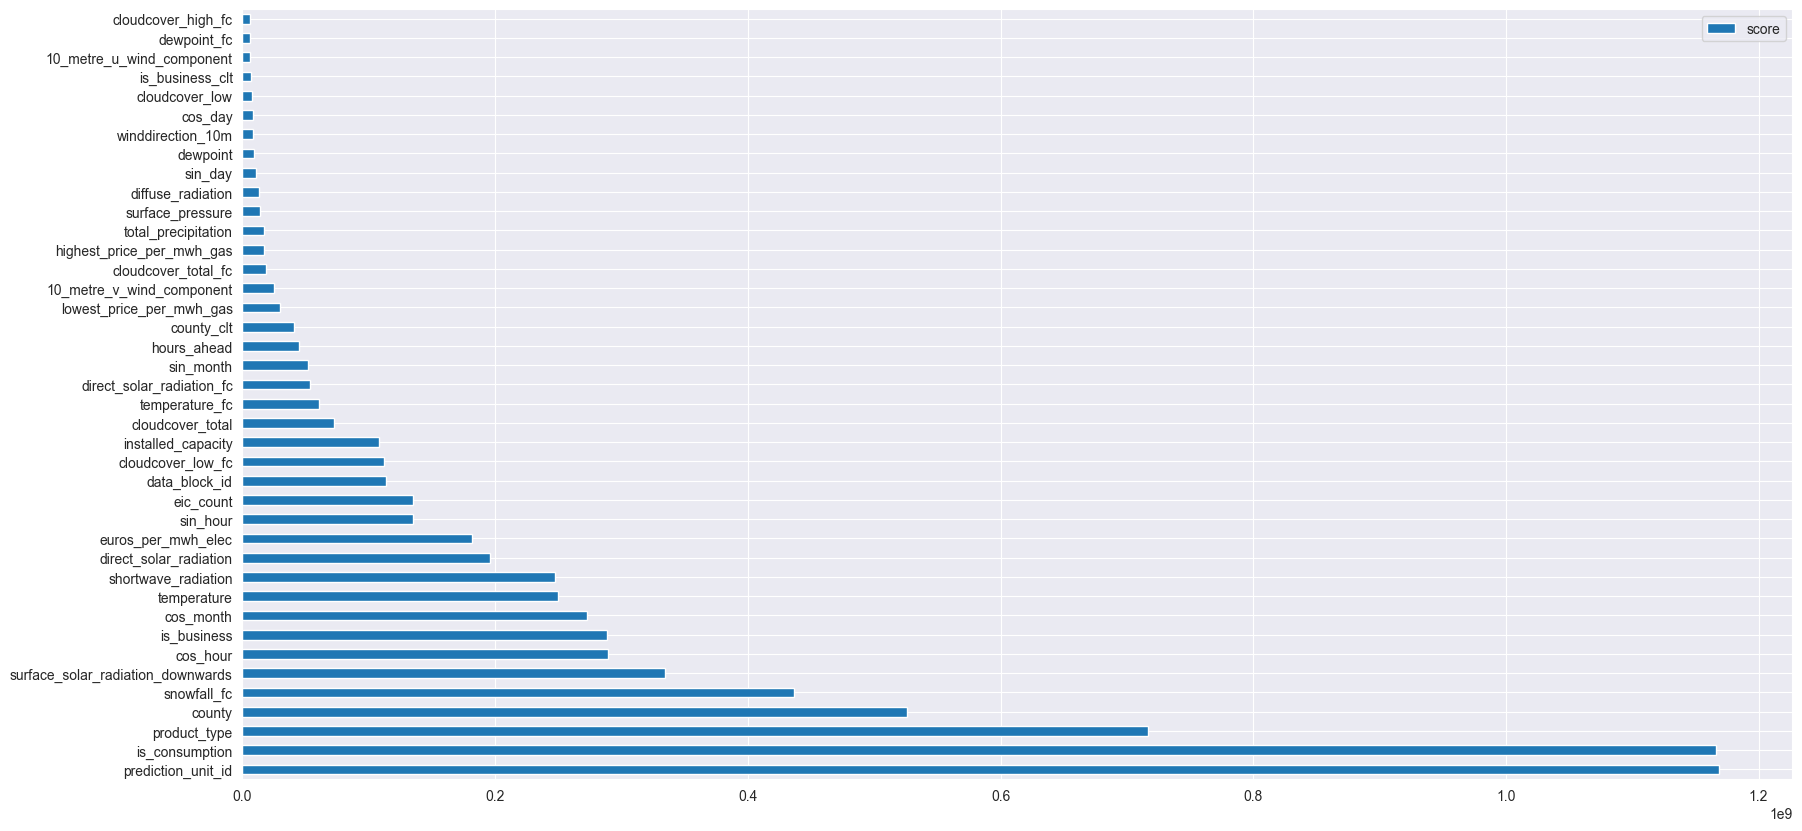

In [29]:
feature_important = xgb.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

In [35]:
import hyperopt as hp
from hyperopt import STATUS_OK, fmin, hp, tpe
import xgboost as xgb
import numpy as np

def score(params):
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    gbm_model = xgb.train(params, dtrain, num_round,
                          evals=watchlist,
                          verbose_eval=True)
    predictions = gbm_model.predict(dvalid)
    score = mean_absolute_error(y_test, predictions)
    # TODO: Add the importance for the selected features
    # The score function should return the loss (1-score)
    # since the optimize function looks for the minimum
    return {'loss': score, 'status': STATUS_OK}

def optimize(random_state=42):
  space = {
      'n_estimators': hp.quniform('n_estimators', 10, 50, 1),
      # 'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
      # A problem with max_depth casted to float instead of int with
      # the hp.quniform method.
      'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
      # 'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
      # 'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
      # 'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
      # 'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
      'eval_metric': 'mae',
      # 'objective': 'binary:logistic',
      # Increase this number if you have more cores. Otherwise, remove it and it will default
      # to the maxium number.
      'nthread': 4,
      'booster': 'gbtree',
      'tree_method': 'exact',
      # 'silent': 1,
      'seed': random_state
  }
  best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=150)
  return best

best_hyperparams = optimize(
    # trials
)
print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

[0]	eval-mae:309.85041	train-mae:316.03043             
[1]	eval-mae:274.64099	train-mae:280.25408             
[2]	eval-mae:252.41035	train-mae:257.46189             
[3]	eval-mae:235.10183	train-mae:239.78669             
[4]	eval-mae:223.86412	train-mae:228.57507             
[5]	eval-mae:208.75447	train-mae:213.60041             
[6]	eval-mae:201.20922	train-mae:206.30474             
[7]	eval-mae:189.07015	train-mae:193.52777             
[8]	eval-mae:185.51183	train-mae:189.40900             
[9]	eval-mae:185.14129	train-mae:188.98193             
[10]	eval-mae:182.99667	train-mae:186.54043            
[11]	eval-mae:182.35767	train-mae:185.67171            
[12]	eval-mae:180.72885	train-mae:184.01494            
[13]	eval-mae:178.63187	train-mae:181.95899            
[14]	eval-mae:177.98403	train-mae:181.30844            
[15]	eval-mae:171.99352	train-mae:174.81184            
[16]	eval-mae:170.53738	train-mae:173.44723            
[17]	eval-mae:167.77399	train-mae:170.85030     

KeyboardInterrupt: 

# Analyses

In [ ]:
import seaborn as sns

# Creating a temporary dataframe for MAE errors
d = {"Model" : ["Dummy", "LinearRegression", "Lasso", "Elastic Net","RandomForest", "XGBoost"],
     "MAE" : [dummy_mae, reg_mae, lasso_mae, elastic_mae, RFR_mae, xgb_mae]}
mae_array = pd.DataFrame(data=d, columns=["Model", "MAE"])
print(mae_array)

# Creating the graph
ax = sns.barplot(mae_array, x="Model", y="MAE")
ax.bar_label(ax.containers[0], fontsize=10);